In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import re

%matplotlib inline 


In [3]:
ls

Data Clean final.ipynb
Data Cleaning 2.ipynb
Data_Skills-master/
GA-DSI-master/
Job-Salary-Webscraping-and-Prediction-master/
Project 4 - Data Cleaning.ipynb
Project 4 - Question 1, part 1.ipynb
Project 4 - Question 1, part 2.ipynb
Project 4 - Question 2 part 2.ipynb
Project 4 - Question 2.ipynb
Project 4 web scrape #2.ipynb
Project_4_web_scrape.ipynb
README.md*
advert.csv
chromedriver/
company1
df_modelling
dollar_sign.jpg
job_linker1.csv
kisspng-united-states-dollar-dollar-sign-logo-money-dollar-vector-5b4ee367f410c6.9428988415318966799997.png
linkedin-jobs-scraper-master/
plot_forest_importances.ipynb
rawdata.csv
scrape-indeed-data-jobs-master/
seek.csv
seek_clean.csv
seeker.csv
web scrape #3.ipynb


In [4]:
'''
Here I import my web scraped data.
'''

seek = pd.read_csv('./seeker.csv', index_col=0)

In [5]:
seek.head()

,job_title,job_location,job_salary,advertiser,search_category,url,job_post_date,job_desc
0,Data Scientist,Sydney,Unknown,Motion Recruitment,Data Science,www.seek.com.au/job/38274601?type=standout&sea...,23 Jan 2019,ABOUT QHR/eQ8 year of providing consulting...
1,Data Science Delivery Lead,Sydney,"$150,000 - $180,000 package",Intellify,Data Science,www.seek.com.au/job/38267034?type=standout&sea...,5 Feb 2019,About Intellify Intellify is a data science an...
2,Head of Data Science Engineering & Products,Sydney,Unknown,FIRESOFT Consulting,Data Science,www.seek.com.au/job/38248336?type=standard&sea...,1 Feb 2019,Head of Data Science Engineering & Products - ...
3,Machine Learning Engineer / Scientist - Optimi...,Sydney,Circa upto 160k based on skills,Infopeople,Data Science,www.seek.com.au/job/38178979?type=standard&sea...,23 Jan 2019,This role is a newly created role to work with...
4,Data Analytics & Data Science Team Leader,Sydney,"$110,172.00 - $119,921.00",AUSTRALIAN FEDERAL POLICE,Data Science,www.seek.com.au/job/38194317?type=standout&sea...,25 Jan 2019,The mission of the AFP is to provide dynamic a...


In [6]:
'''
Here I add another column of the job salary. I found this helpful downstream to confirm whether the 
cleaned data was relevant.
'''

seek['salary_desc'] = seek['job_salary']

In [8]:
'''
Here I create a new blank column and fill it if the job salary includes super. In visual inspection it appeared that 
the term super was only included if super was not part of the total salary.
'''

seek['super'] = np.nan

In [9]:
seek.loc[seek.job_salary.str.contains('uper'), 'super'] = 1.1

In [10]:
'''
Here I removed and replaced some symbols, and replaced the k values with '000' where appropriate.
'''

seek.job_salary = seek.job_salary.str.replace(',', '')
seek.job_salary = seek.job_salary.str.replace('$', '')
seek.job_salary = seek.job_salary.str.replace('-', ' ')
seek.job_salary = seek.job_salary.str.replace('Unknown', 'Nan')
seek.job_salary = seek.job_salary.str.replace('k', '000')
seek.job_salary = seek.job_salary.str.replace('K', '000')


,job_title,job_location,job_salary,advertiser,search_category,url,job_post_date,job_desc,salary_desc,super
0,Data Scientist,Sydney,Nan,Motion Recruitment,Data Science,www.seek.com.au/job/38274601?type=standout&sea...,23 Jan 2019,ABOUT QHR/eQ8 year of providing consulting...,Unknown,NaN
1,Data Science Delivery Lead,Sydney,150000 180000 pac000age,Intellify,Data Science,www.seek.com.au/job/38267034?type=standout&sea...,5 Feb 2019,About Intellify Intellify is a data science an...,"$150,000 - $180,000 package",NaN
2,Head of Data Science Engineering & Products,Sydney,Nan,FIRESOFT Consulting,Data Science,www.seek.com.au/job/38248336?type=standard&sea...,1 Feb 2019,Head of Data Science Engineering & Products - ...,Unknown,NaN
3,Machine Learning Engineer / Scientist - Optimi...,Sydney,Circa upto 160000 based on s000ills,Infopeople,Data Science,www.seek.com.au/job/38178979?type=standard&sea...,23 Jan 2019,This role is a newly created role to work with...,Circa upto 160k based on skills,NaN
4,Data Analytics & Data Science Team Leader,Sydney,110172.00 119921.00,AUSTRALIAN FEDERAL POLICE,Data Science,www.seek.com.au/job/38194317?type=standout&sea...,25 Jan 2019,The mission of the AFP is to provide dynamic a...,"$110,172.00 - $119,921.00",NaN
5,Senior Data Science Executive,Sydney,Nan,The Nielsen Company (Australia) Pty Ltd,Data Science,www.seek.com.au/job/38257609?type=standout&sea...,4 Feb 2019,Nielsen is a global performance management com...,Unknown,NaN
6,Junior Data Scientist,Sydney,Nan,Motion Recruitment,Data Science,www.seek.com.au/job/38108166?type=standout&sea...,15 Jan 2019,About the business and the role My client is ...,Unknown,NaN
7,Data Scientist with Consultancy Experience,Sydney,Nan,360HR Pty Ltd,Data Science,www.seek.com.au/job/38261034?type=standard&sea...,4 Feb 2019,"In this role, you will be managing data from m...",Unknown,NaN
8,Senior Data Science (Loyalty) :: $170K + Super...,Sydney,170000+Super+ Bonus,Correlate Resources,Data Science,www.seek.com.au/job/38153321?type=standout&sea...,21 Jan 2019,Senior Data Scientist (Loyalty) :: $170K + Sup...,$170K+Super+ Bonus,1.1
9,Senior Data Scientist,Sydney,120000 to 160000,Preacta Recruitment,Data Science,www.seek.com.au/job/38265180?type=standard&sea...,5 Feb 2019,Currently working for one of Australia’s leadi...,"$120,000 to $160,000",NaN


In [11]:
'''
Here we used regular expressions to extract the numbers from the job salary column for subsequent cleaning.
'''

def find_salary(salary):
    return re.findall(r'\d+', salary)

In [12]:
seek.job_salary = seek.job_salary.apply(find_salary)
seek.job_salary

0                             []
1          [150000, 180000, 000]
2                             []
3                  [160000, 000]
4       [110172, 00, 119921, 00]
5                             []
6                             []
7                             []
8                       [170000]
9               [120000, 160000]
10                            []
11           [80000, 00, 120000]
12                            []
13                            []
14                            []
15              [130000, 160000]
16                            []
17                         [000]
18                [75000, 95000]
19                            []
20                            []
21                            []
22                            []
23                            []
24                            []
25                            []
26                            []
27       [134000, 201000, 15, 4]
28                            []
29                            []
          

In [13]:
'''
Here I remove all of the 000, 00 as they are artefacts of the conversion of k's in the earlier step.
And I remove 1 instance of 37 cents as it is not relevant to our subsequent analysis.
'''

for item in seek.job_salary:
    for i in item:
        if i == '000':
            item.remove(i)
        elif i == '00':
            item.remove(i)
        elif i == '37':
            item.remove(i)
        else:
            pass
        

In [14]:
'''
Here I convert any 0 values into nan.
'''

seek.job_salary = seek.job_salary.apply(lambda y: np.nan if len(y)==0 else y)


In [17]:
'''
This fair complex bit of code is too go through all the salary figures and returns the value if there is only 1;
the average of 2 if they are of the same type/length and modifies the terms for subsequent averaging if they are
different due to formatting.
'''

for i in range(len(seek)):
    try:
        m1 = sorted(np.array(seek.job_salary[i]).astype(float))[-1]
        m2 = sorted(np.array(seek.job_salary[i]).astype(float))[-2]
        if m2 > 20 and len(str(m2)) < len(str(m1)) and (len(str(m1)) - len(str(m2))) > 1 and m2 < 100 and m1 >= 100000:
            m3 = m2 * 10 ** ((len(str(m1)) - len(str(m2)))-1)
            mav = (m1 + m3)/2
            seek.job_salary.loc[i] =  mav           
        elif m2 > 20 and len(str(m2)) < len(str(m1)) and (len(str(m1)) - len(str(m2))) > 1:
            m3 = m2 * 10 ** (len(str(m1)) - len(str(m2)))
            mav1 = (m1 + m3)/2
            seek.job_salary.loc[i] =  mav1
        elif m2 > 20:
            mav2 = (m1 + m2)/2
            seek.job_salary.loc[i] =  mav2
        else:
            seek.job_salary.loc[i] = m1
    except:
        try:
            n = np.array(seek.job_salary[i]).astype(float)[0]
            seek.job_salary.loc[i] = n
        except:
            pass
        

/Users/mbp15/.local/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
'''
Here I confirm that the code has done what I wanted it to.
'''

seek.job_salary


0          NaN
1       165000
2          NaN
3       160000
4       115046
5          NaN
6          NaN
7          NaN
8       170000
9       140000
10         NaN
11      100000
12         NaN
13         NaN
14         NaN
15      145000
16         NaN
17         NaN
18       85000
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27      167500
28         NaN
29         NaN
         ...  
3650       NaN
3651       NaN
3652       NaN
3653       NaN
3654       NaN
3655       NaN
3656       825
3657       NaN
3658       NaN
3659       NaN
3660       NaN
3661       NaN
3662        45
3663       NaN
3664       NaN
3665       NaN
3666       NaN
3667       NaN
3668       NaN
3669       NaN
3670       NaN
3671       NaN
3672       NaN
3673       NaN
3674       NaN
3675     664.5
3676       NaN
3677       NaN
3678       NaN
3679       NaN
Name: job_salary, Length: 3680, dtype: object

In [19]:
'''
Here I fill the nan's with 0 for subsequent cleaning. I do this for all columns.
'''

seek.job_salary = seek.job_salary.fillna(0)


In [20]:
seek.super = seek.super.fillna(1)


In [21]:
'''
Convert all salary values to floats. We require this for the calculations that follow.
'''

seek.job_salary = seek.job_salary.apply(lambda x: np.array(x).astype(float))


In [22]:
'''
Determine multiplication factor for different salaries based upon the range of salary figures. Originally I tried
to do this with specific terms, but I found just using the number ranges resulted in better accruracy.
'''

seek['payt2'] = [(n * 0) if (n <= 20) else (n * 2080)  if (n <= 300) else (n * 365) if (n <= 1200) 
                 else (n * 52) if (n <= 5500) else (n * 12) if (n <= 30000) else (n * 1) for n in seek['job_salary']]


In [23]:
'''
Multiply the pay column by the super column in order to account for salaries that did not have super included in the
base salary.
'''

seek['pay_total2'] = seek.payt2 * seek.super


In [25]:
'''
Eliminate all job salaries that are equal to 0.
'''

seek3 = seek[seek.pay_total2 != 0]


In [26]:
'''
Remove salaries that were greater than 500,000. They were inspected first and found to all be errored.
'''

seek3 = seek3[seek3.pay_total2<500000]


In [27]:
'''
Remove all salaries that were less that 40,000. These were also visually inspected first and 
found to be errored in general.
'''

seek3 = seek3[seek3.pay_total2>40000]


In [28]:
seek3


,job_title,job_location,job_salary,advertiser,search_category,url,job_post_date,job_desc,salary_desc,super,payt2,pay_total2
1,Data Science Delivery Lead,Sydney,165000.0,Intellify,Data Science,www.seek.com.au/job/38267034?type=standout&sea...,5 Feb 2019,About Intellify Intellify is a data science an...,"$150,000 - $180,000 package",1.0,165000.0,165000.0
3,Machine Learning Engineer / Scientist - Optimi...,Sydney,160000.0,Infopeople,Data Science,www.seek.com.au/job/38178979?type=standard&sea...,23 Jan 2019,This role is a newly created role to work with...,Circa upto 160k based on skills,1.0,160000.0,160000.0
4,Data Analytics & Data Science Team Leader,Sydney,115046.5,AUSTRALIAN FEDERAL POLICE,Data Science,www.seek.com.au/job/38194317?type=standout&sea...,25 Jan 2019,The mission of the AFP is to provide dynamic a...,"$110,172.00 - $119,921.00",1.0,115046.5,115046.5
8,Senior Data Science (Loyalty) :: $170K + Super...,Sydney,170000.0,Correlate Resources,Data Science,www.seek.com.au/job/38153321?type=standout&sea...,21 Jan 2019,Senior Data Scientist (Loyalty) :: $170K + Sup...,$170K+Super+ Bonus,1.1,170000.0,187000.0
9,Senior Data Scientist,Sydney,140000.0,Preacta Recruitment,Data Science,www.seek.com.au/job/38265180?type=standard&sea...,5 Feb 2019,Currently working for one of Australia’s leadi...,"$120,000 to $160,000",1.0,140000.0,140000.0
11,Data Scientist,Sydney,100000.0,Talent – Winner ‘Seek Large Recruitment Agency...,Data Science,www.seek.com.au/job/38112245?type=standout&sea...,15 Jan 2019,Data Scientist - Cognitive Science & AIJoin th...,$80000.00 - $120000 per annum,1.0,100000.0,100000.0
15,Data Scientist,Sydney,145000.0,Precision Sourcing,Data Science,www.seek.com.au/job/38140287?type=standout&sea...,18 Jan 2019,The CompanyThis is one of the most exciting co...,$130k - $160k p.a.,1.0,145000.0,145000.0
18,Senior Business Intelligence Consultant,Sydney,85000.0,AI Australia,Data Science,www.seek.com.au/job/38225977?type=standout&sea...,30 Jan 2019,As a leading Australian owned Artificial Intel...,"$75,000 - $95,000",1.0,85000.0,85000.0
27,Research Scientist - Blockchain and Software ...,Sydney,167500.0,CSIRO,Data Science,www.seek.com.au/job/38200815?type=standout&sea...,25 Jan 2019,Apply your expertise in computer science/soft...,$134K - $201K + up to 15.4% super,1.1,167500.0,184250.0
31,Fisheries Economist - Pacific Islands Fisherie...,Sydney,75074.5,Employment Office,Data Science,www.seek.com.au/job/38064522?type=standard&sea...,10 Jan 2019,About the OpportunityFFA has an exciting oppor...,"USD $64,018-$86,131 + accommodation & relocation!",1.0,75074.5,75074.5


In [29]:
'''
Ensure column is all floats (though not sure why I thought they wouldn't be.)
'''

seek3['pay_total2']=seek3.pay_total2.astype(float)



In [30]:
'''
What we have left after cleaning.
'''

len(seek3)

1217

In [31]:
'''
Convert to csv to keep it safe.
'''

seek3.to_csv('./seek3.csv')


In [29]:
'''
Now I will separate out the different salaries based on job type. I start by ensuring that all the text 
in the job_titles is in lowercase.
'''

seek3.job_title = seek3.job_title.str.lower()


In [30]:
seek3


,job_title,job_location,job_salary,advertiser,search_category,url,job_post_date,job_desc,salary_desc,super,payt2,pay_total2
1,data science delivery lead,Sydney,165000.0,Intellify,Data Science,www.seek.com.au/job/38267034?type=standout&sea...,5 Feb 2019,About Intellify Intellify is a data science an...,"$150,000 - $180,000 package",1.0,165000.0,165000.0
3,machine learning engineer / scientist - optimi...,Sydney,160000.0,Infopeople,Data Science,www.seek.com.au/job/38178979?type=standard&sea...,23 Jan 2019,This role is a newly created role to work with...,Circa upto 160k based on skills,1.0,160000.0,160000.0
4,data analytics & data science team leader,Sydney,115046.5,AUSTRALIAN FEDERAL POLICE,Data Science,www.seek.com.au/job/38194317?type=standout&sea...,25 Jan 2019,The mission of the AFP is to provide dynamic a...,"$110,172.00 - $119,921.00",1.0,115046.5,115046.5
8,senior data science (loyalty) :: $170k + super...,Sydney,170000.0,Correlate Resources,Data Science,www.seek.com.au/job/38153321?type=standout&sea...,21 Jan 2019,Senior Data Scientist (Loyalty) :: $170K + Sup...,$170K+Super+ Bonus,1.1,170000.0,187000.0
9,senior data scientist,Sydney,140000.0,Preacta Recruitment,Data Science,www.seek.com.au/job/38265180?type=standard&sea...,5 Feb 2019,Currently working for one of Australia’s leadi...,"$120,000 to $160,000",1.0,140000.0,140000.0
11,data scientist,Sydney,100000.0,Talent – Winner ‘Seek Large Recruitment Agency...,Data Science,www.seek.com.au/job/38112245?type=standout&sea...,15 Jan 2019,Data Scientist - Cognitive Science & AIJoin th...,$80000.00 - $120000 per annum,1.0,100000.0,100000.0
15,data scientist,Sydney,145000.0,Precision Sourcing,Data Science,www.seek.com.au/job/38140287?type=standout&sea...,18 Jan 2019,The CompanyThis is one of the most exciting co...,$130k - $160k p.a.,1.0,145000.0,145000.0
18,senior business intelligence consultant,Sydney,85000.0,AI Australia,Data Science,www.seek.com.au/job/38225977?type=standout&sea...,30 Jan 2019,As a leading Australian owned Artificial Intel...,"$75,000 - $95,000",1.0,85000.0,85000.0
27,research scientist - blockchain and software ...,Sydney,167500.0,CSIRO,Data Science,www.seek.com.au/job/38200815?type=standout&sea...,25 Jan 2019,Apply your expertise in computer science/soft...,$134K - $201K + up to 15.4% super,1.1,167500.0,184250.0
31,fisheries economist - pacific islands fisherie...,Sydney,75074.5,Employment Office,Data Science,www.seek.com.au/job/38064522?type=standard&sea...,10 Jan 2019,About the OpportunityFFA has an exciting oppor...,"USD $64,018-$86,131 + accommodation & relocation!",1.0,75074.5,75074.5


In [31]:
'''
Here I create a column to identify which job postings are for senior level positions and which are for normal level 
positions. I will use this information for subsequent calculations.
'''

seek3['seniority'] = np.nan


In [32]:
seek3.loc[seek3.job_title.str.contains('sen'), 'seniority'] = 'Senior'
seek3.loc[seek3.job_title.str.contains('lea'), 'seniority'] = 'Senior'


In [33]:
seek3.seniority.value_counts()


Senior    274
Name: seniority, dtype: int64

In [34]:
seek3.seniority = seek3.seniority.fillna('Normal')


In [35]:
seek3.search_category = (seek3.seniority + ' ' + seek3.search_category)


In [36]:
seek3.search_category.value_counts()


Normal Data Analyst             629
Senior Data Analyst             177
Normal Data Science             125
Normal Data Engineer             96
Normal Business Intelligence     93
Senior Data Engineer             40
Senior Data Science              36
Senior Business Intelligence     21
Name: search_category, dtype: int64

In [37]:
'''
Here I am essentially working backward to create broader categories again. This is for some modelling 
I am performing later.
'''

seek3['in_title'] = np.nan


In [38]:
seek3.loc[seek3.job_title.str.contains('anal'), 'in_title'] = 'Data Analyst'
seek3.loc[seek3.job_title.str.contains('bus'), 'in_title'] = 'Business Intelligence'
seek3.loc[seek3.job_title.str.contains('eng'), 'in_title'] = 'Data Engineer'
seek3.loc[seek3.job_title.str.contains('sci'), 'in_title'] = 'Data Scientist'


In [39]:
seek3.in_title.value_counts()


Data Analyst             241
Business Intelligence    220
Data Engineer            131
Data Scientist            29
Name: in_title, dtype: int64

In [40]:
'''
Here we calculate the median value for each job category as defined earlier.
'''

seek3.groupby(['search_category']).pay_total2.median()


search_category
Normal Business Intelligence    118146.60
Normal Data Analyst             121000.00
Normal Data Engineer            125000.00
Normal Data Science             120999.45
Senior Business Intelligence    125000.00
Senior Data Analyst             150000.00
Senior Data Engineer            135000.00
Senior Data Science             140000.00
Name: pay_total2, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118cfc630>,
      dtype=object)

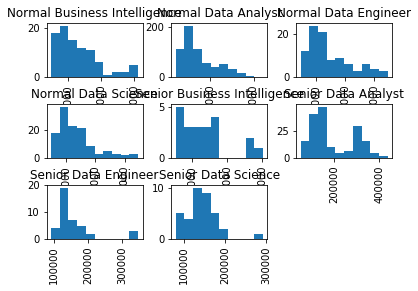

In [41]:
'''
The reason that we are using median is due to the distribution of salaries, as presented in the histograms below.
'''

seek3['pay_total2'].hist(by=seek3['search_category'])

In [42]:
'''
Here I am storing the median values for subsequent steps. I didn't need to do this, but I wanted to have all the values
easily inspectable.
'''

med_nbi = 118146.60
med_nda = 121000
med_nde = 125000
med_nds = 120999.45
med_sbi = 125000
med_sda = 150000
med_sde = 135000
med_sds = 140000


In [44]:
'''
Here I bascially do the same as above, but on the whole dataset versus a split-out set. If I had more time I would
go through the above and remove it as it wasn't really necessary in the long run, however, I don't want to delete it
in case I've used if for something else in one of my subsequent models.
'''

seek.job_title = seek.job_title.str.lower()


In [45]:
seek['seniority'] = np.nan


In [46]:
seek.loc[seek.job_title.str.contains('sen'), 'seniority'] = 'Senior'
seek.loc[seek.job_title.str.contains('lea'), 'seniority'] = 'Senior'


In [47]:
seek.seniority.value_counts()


Senior    730
Name: seniority, dtype: int64

In [48]:
seek.seniority = seek.seniority.fillna('Normal')


In [49]:
seek


,job_title,job_location,job_salary,advertiser,search_category,url,job_post_date,job_desc,salary_desc,super,payt2,pay_total2,seniority
0,data scientist,Sydney,0.0,Motion Recruitment,Data Science,www.seek.com.au/job/38274601?type=standout&sea...,23 Jan 2019,ABOUT QHR/eQ8 year of providing consulting...,Unknown,1.0,0.0,0.0,Normal
1,data science delivery lead,Sydney,165000.0,Intellify,Data Science,www.seek.com.au/job/38267034?type=standout&sea...,5 Feb 2019,About Intellify Intellify is a data science an...,"$150,000 - $180,000 package",1.0,165000.0,165000.0,Senior
2,head of data science engineering & products,Sydney,0.0,FIRESOFT Consulting,Data Science,www.seek.com.au/job/38248336?type=standard&sea...,1 Feb 2019,Head of Data Science Engineering & Products - ...,Unknown,1.0,0.0,0.0,Normal
3,machine learning engineer / scientist - optimi...,Sydney,160000.0,Infopeople,Data Science,www.seek.com.au/job/38178979?type=standard&sea...,23 Jan 2019,This role is a newly created role to work with...,Circa upto 160k based on skills,1.0,160000.0,160000.0,Senior
4,data analytics & data science team leader,Sydney,115046.5,AUSTRALIAN FEDERAL POLICE,Data Science,www.seek.com.au/job/38194317?type=standout&sea...,25 Jan 2019,The mission of the AFP is to provide dynamic a...,"$110,172.00 - $119,921.00",1.0,115046.5,115046.5,Senior
5,senior data science executive,Sydney,0.0,The Nielsen Company (Australia) Pty Ltd,Data Science,www.seek.com.au/job/38257609?type=standout&sea...,4 Feb 2019,Nielsen is a global performance management com...,Unknown,1.0,0.0,0.0,Senior
6,junior data scientist,Sydney,0.0,Motion Recruitment,Data Science,www.seek.com.au/job/38108166?type=standout&sea...,15 Jan 2019,About the business and the role My client is ...,Unknown,1.0,0.0,0.0,Normal
7,data scientist with consultancy experience,Sydney,0.0,360HR Pty Ltd,Data Science,www.seek.com.au/job/38261034?type=standard&sea...,4 Feb 2019,"In this role, you will be managing data from m...",Unknown,1.0,0.0,0.0,Normal
8,senior data science (loyalty) :: $170k + super...,Sydney,170000.0,Correlate Resources,Data Science,www.seek.com.au/job/38153321?type=standout&sea...,21 Jan 2019,Senior Data Scientist (Loyalty) :: $170K + Sup...,$170K+Super+ Bonus,1.1,170000.0,187000.0,Senior
9,senior data scientist,Sydney,140000.0,Preacta Recruitment,Data Science,www.seek.com.au/job/38265180?type=standard&sea...,5 Feb 2019,Currently working for one of Australia’s leadi...,"$120,000 to $160,000",1.0,140000.0,140000.0,Senior


In [50]:
seek['in_title'] = np.nan


In [52]:
seek.loc[seek.job_title.str.contains('anal'), 'in_title'] = 'Data Analyst'
seek.loc[seek.job_title.str.contains('bus'), 'in_title'] = 'Business Intelligence'
seek.loc[seek.job_title.str.contains('eng'), 'in_title'] = 'Data Engineer'
seek.loc[seek.job_title.str.contains('sci'), 'in_title'] = 'Data Scientist'


In [53]:
seek['jbd'] = (seek.seniority + ' ' + seek.in_title)


In [54]:
seek.jbd.value_counts()


Normal Data Analyst             616
Normal Business Intelligence    421
Normal Data Engineer            286
Senior Business Intelligence    135
Senior Data Engineer            130
Senior Data Analyst             122
Normal Data Scientist            66
Senior Data Scientist            27
Name: jbd, dtype: int64

In [55]:
avg_nbi = 130859.43
avg_nda = 149645.09
avg_nde = 147936.77
avg_nds = 132894.24
avg_sbi = 133632.71
avg_sda = 194027.12
avg_sde = 156024.96
avg_sds = 142280.70


In [56]:
med_nbi = 118146.60
med_nda = 121000
med_nde = 125000
med_nds = 120999.45
med_sbi = 125000
med_sda = 150000
med_sde = 135000
med_sds = 140000


In [60]:
'''
I used this to fill all of the missing values with the median valiue as calculated.
'''

for index, row in seek.iterrows():
    if row['jbd'] == 'Normal Data Scientist' and row['pay_total2'] == 0:
        seek.pay_total2[index] = med_nds
    elif row['jbd'] == 'Normal Business Intelligence' and row['pay_total2'] == 0:
        seek.pay_total2[index] = med_nbi
    elif row['jbd'] == 'Normal Data Engineer' and row['pay_total2'] == 0:
        seek.pay_total2[index] = med_nde
    elif row['jbd'] == 'Normal Data Analyst' and row['pay_total2'] == 0:
        seek.pay_total2[index] = med_nda  
    elif row['jbd'] == 'Senior Business Intelligence' and row['pay_total2'] == 0:
        seek.pay_total2[index] = med_sbi    
    elif row['jbd'] == 'Senior Data Engineer' and row['pay_total2'] == 0:
        seek.pay_total2[index] = med_sde
    elif row['jbd'] == 'Senior Data Analyst' and row['pay_total2'] == 0:
        seek.pay_total2[index] = med_sda    
    elif row['jbd'] == 'Senior Data Scientist' and row['pay_total2'] == 0:
        seek.pay_total2[index] = med_sds     
        
        

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is tryi

In [62]:
'''
Dropped the unnecessary columns
'''

seek = seek.drop(['job_salary', 'search_category', 'salary_desc', 'super', 'payt2', 'seniority', 'in_title'], axis=1)


In [65]:
'''
Remove salaries that are 0
'''

seek = seek[seek.pay_total2 != 0]

In [68]:
'''
Fill missing job by description (jbd) values with 0, then remove then.
'''

seek.jbd = seek.jbd.fillna(0)


/Users/mbp15/.local/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [70]:
seek = seek[seek.jbd != 0]

In [71]:
'Export cleaned data to csv for modelling.'

seek.to_csv('./seek_clean.csv')